# **K-Nearest-Neighbors (KNN)**

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
king_data=pd.read_excel('/content/King-RookvsKing-Pawn.xlsx')

# **Importing the data**

# About Data

<img src='https://images.squarespace-cdn.com/content/v1/5c36736d9d5abb8b44c6b7f7/1586468701075-G14EXPZE2VNMJFKDCQ0T/rook+and+king+logo.jpg?format=500w' align="center"><br>
  Chess End-Game -- King+Rook versus King+Pawn on a7
  (usually abbreviated KRKPA7).  The pawn on a7 means it is one square
  away from queening.  It is the King+Rook's side (white) to move.

In [3]:
king_data.head(10)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won
5,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,t,f,f,f,t,t,n,won
6,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won
7,f,f,f,f,t,f,f,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
8,f,f,f,f,f,f,f,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,t,f,f,t,t,n,won
9,f,f,f,f,f,f,t,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won


In [4]:
king_data.columns

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21', 'Column22', 'Column23', 'Column24',
       'Column25', 'Column26', 'Column27', 'Column28', 'Column29', 'Column30',
       'Column31', 'Column32', 'Column33', 'Column34', 'Column35', 'Column36',
       'Column37'],
      dtype='object')

In [5]:
object_col=['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12',
       'Column13', 'Column14', 'Column15', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21', 'Column22', 'Column23', 'Column24',
       'Column25', 'Column26', 'Column27', 'Column28', 'Column29', 'Column30',
       'Column31', 'Column32', 'Column33', 'Column34', 'Column35', 'Column36'
       ]

Dropping NaN values

In [6]:
king_data.dropna(axis=0)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,t,f,f,f,f,f,t,f,f,f,f,t,l,f,b,f,f,t,f,f,f,f,t,t,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,f,t,l,f,b,f,f,t,f,f,f,f,t,f,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,f,f,f,f,t,f,f,f,f,t,l,f,n,f,f,t,f,f,f,f,t,f,f,t,f,f,t,f,f,t,f,t,f,n,nowin
3194,t,f,t,f,f,f,t,f,f,f,f,t,l,t,b,t,f,t,f,f,f,f,f,t,f,t,f,f,t,f,f,t,f,f,f,n,nowin


In [7]:
print(f'{king_data.Column37.unique()}')

['won' 'nowin']


In [8]:
king_data['Column37']=king_data['Column37'].apply({'won':2,'nowin':1}.get)

In [9]:
king_data.head(10)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,2
1,f,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,2
2,f,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,2
3,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,2
4,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,2
5,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,t,f,f,f,t,t,n,2
6,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,t,f,t,f,f,f,f,f,f,f,t,t,n,2
7,f,f,f,f,t,f,f,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,2
8,f,f,f,f,f,f,f,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,t,f,f,t,t,n,2
9,f,f,f,f,f,f,t,f,f,f,t,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,2


In [10]:
X=king_data.copy()
y=X.pop('Column37')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

In [11]:
y_test.head(10)

285     2
1626    2
1308    1
3047    1
1953    2
415     2
1229    1
2512    1
2972    1
1271    1
Name: Column37, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

one_hot_X=pd.DataFrame(OH_encoder.fit_transform(X[object_col]))
one_hot_X.index = X.index

In [13]:
num_X = X.drop(object_col, axis=1)

In [14]:
OH_X = pd.concat([num_X, one_hot_X], axis=1)

## Splitting the Data
## Training and Pedicting the model using KNN Algorithm
## Checking Model Accuracy


In [15]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

acc_score=[]
for i in range(5,10):
  X_train,X_test,y_train,y_test=train_test_split(OH_X,y,test_size=i/10)
  model=knn(n_neighbors=1,
          leaf_size=1,
          algorithm='brute',
          weights='distance',
          p=1
          )
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  acc_score.append(accuracy_score(y_test,pred))

## Plotting the Accuracy Scores

Text(0, 0.5, 'Accuracy Score')

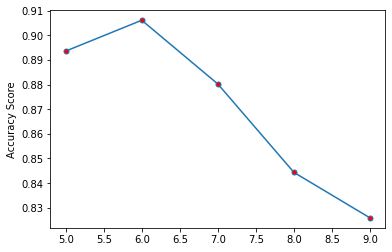

In [16]:
plt.plot(range(5,10),acc_score,marker='o',markerfacecolor='red',markersize=5)
plt.ylabel('Accuracy Score')

### Test size of 0.6 gives us better accuracy than other sizes.

In [17]:
print(acc_score[1])

0.9061522419186653
